# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [96]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

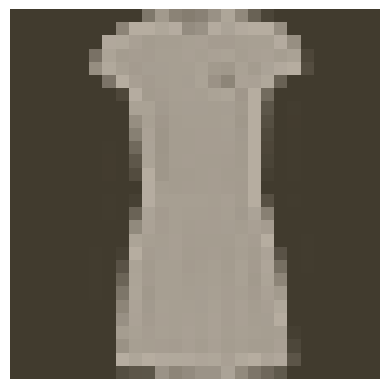

In [53]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [61]:
# import libraries
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

In [63]:
# TODO: Define your network architecture here
# FIRST MODEL ---> Same as MNIST
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        socres = model(images)
        loss = criterion(socres, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.6033439352187013
Training loss: 0.822185129753308
Training loss: 0.6593440402227678
Training loss: 0.5908547085739656
Training loss: 0.5492680426091273
Training loss: 0.5212553796419965
Training loss: 0.5006185209890927
Training loss: 0.4848327173638954
Training loss: 0.4712544989738383
Training loss: 0.4605920519401778
Training loss: 0.45108895129295806
Training loss: 0.44337640834579084
Training loss: 0.4362701310404836
Training loss: 0.42918605991263886
Training loss: 0.4230939556064128


In [65]:
# SECOND MODEL ---> Remove a layer with respect the original model
model_2 = nn.Sequential(nn.Linear(784, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.003)

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        socres = model_2(images)
        loss = criterion(socres, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.2087839389406543
Training loss: 0.6962082934087274
Training loss: 0.6048341184409697
Training loss: 0.559238282475136
Training loss: 0.5299046272789237
Training loss: 0.5093269910194727
Training loss: 0.49341950586228484
Training loss: 0.480547893339637
Training loss: 0.47026009517692047
Training loss: 0.4613990779878742
Training loss: 0.4538252170183765
Training loss: 0.44658016836020487
Training loss: 0.4405275407566953
Training loss: 0.4352956594371084
Training loss: 0.42956014552604416


In [77]:
# THIRD MODEL ---> Same as MNIST but with logits and cross entroppy
model_3 = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss() # Cross entropy is used for classification
optimizer = optim.SGD(model_3.parameters(), lr=0.003)

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        logits = model_3(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.6057445868246083
Training loss: 0.8074007383478221
Training loss: 0.6622557045300124
Training loss: 0.602000384029549
Training loss: 0.5625276610668279
Training loss: 0.534374657279647
Training loss: 0.5123955217569367
Training loss: 0.49509617007935225
Training loss: 0.48050585279523184
Training loss: 0.468213853281317
Training loss: 0.45759283362039876
Training loss: 0.4482588750371801
Training loss: 0.4401820065306702
Training loss: 0.43254193317280143
Training loss: 0.4259976283796052


In [75]:
# The proposed solution defines a class
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [80]:
# TODO: Create the network, define the criterion and optimizer
#using the Classifier(nn.Module) class
model = Classifier()
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003)    # stochastic gradient descent
#optimizer = optim.Adam(model.parameters(), lr=0.003)   # Adam - Adam adjustes its LR to each individual parameter




In [85]:
# TODO: Train the network here
e = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.42080575586763275
Training loss: 0.4138862848091227
Training loss: 0.40776393478358985
Training loss: 0.4022556984507199
Training loss: 0.39724664097782897
Training loss: 0.3918360344160086
Training loss: 0.38678731604107913
Training loss: 0.38212221188903617
Training loss: 0.3783282182935967
Training loss: 0.3740919385510467
Training loss: 0.3691464755962144
Training loss: 0.36535605133723603
Training loss: 0.36175199575039113
Training loss: 0.3583373535098806
Training loss: 0.3545400991575169


In [100]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
#ps = nn.log_softmax(model[-1])
ps = torch.exp(model(img))


# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'